# Data Science 4 Covid19

Carla Sofia de Beir pg38263 | José Alexandre Carvalho pg38932 | Rita Lopes Conde pg40974 | Maria Adília Monteiro pg40961

The objective of this assignment was to study a theme relevant to the current COVID-19 pandemic, including data science, statistical analysis, machine learning and deep learning approaches. The theme we chose was COVID-19 case data in Portugal and its possible connections to several factors. This assignment was made possible by the main data sources, from which said COVID-19 [1] and socio-economic [2] data were retrieved. The meteorological data [3] was retrieved using the accompanying jupter notebook script labelled "DL IPMA".

### Data import and preprocessing

Dependencies to install in base env (for jupyter access):
+ geopandas (& descartes)
+ pandas
+ numpy
+ matplotlib

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas #pip install geopandas & descartes
%matplotlib inline
import os
 
ROOT_FOLDER = "C:\\Users\\liamo\\Documents\\BIOINF\\SIB\\tp\\trab"
CV19_PATH = os.path.join(ROOT_FOLDER,"covid19pt-data-master","covid19pt-data-master","data.csv")
CV19_CONC_PATH = os.path.join(ROOT_FOLDER,"covid19pt-data-master","covid19pt-data-master","data_concelhos.csv")
CV19_CONC_RECENT_PATH = os.path.join(ROOT_FOLDER,"covid19pt-data-master","covid19pt-data-master","data_concelhos_14dias.csv")
CV19_CONC_INCID_PATH = os.path.join(ROOT_FOLDER,"covid19pt-data-master","covid19pt-data-master","data_concelhos_incidencia.csv")

POPGETARIO_CONC_PATH = os.path.join(ROOT_FOLDER,"popres31dez19_porgetario.xlsx")
GETARIO_GENDER_PATH = os.path.join(ROOT_FOLDER,"getario_gender_sim.csv")
# WORLD_TESTS_PATH = os.path.join(ROOT_FOLDER,"owid-covid-tests.csv")
# WORLD_MORTRISK_PATH = os.path.join(ROOT_FOLDER,"owid-covid-mort_risk.csv")
TEMP_PRECIP_PATH = os.path.join(ROOT_FOLDER,"ipma_clean.csv")
MORE_DATA_PATH = os.path.join(ROOT_FOLDER,"more_pordata.csv")
CONC_PATH_MAP = os.path.join(ROOT_FOLDER,"covid19pt-data-master","covid19pt-data-master","extra","mapas","concelhos","concelhos.shp")

In [3]:
# test_data = pd.read_csv(WORLD_TESTS_PATH) 
# # risk_data = pd.read_csv(WORLD_MORTRISK_PATH) 

# test_data = test_data.loc[test_data["location"]=="Portugal",:].reset_index().iloc[:,1:]
# test_data = test_data.loc[:,test_data.isna().sum()<test_data.shape[0]]

# constant = {}
# for c in test_data.columns:
#     if test_data[c].nunique()==1: constant[c] = test_data[c].iloc[0]
# test_data = test_data.drop(list(constant.keys()),axis=1)

# print(constant)
# print(test_data.shape,"\n",test_data.columns)
# print(test_data.head())
# print(test_data.isna().sum())

# print(risk_data.shape,risk_data.columns)

In [4]:
#dados acumulados relativos aos confirmados por concelho
conc_data = pd.read_csv(CV19_CONC_PATH, parse_dates=True, infer_datetime_format=True,index_col=[0]) 
#dados de confirmados do acumulado dos 14 dias anteriores à data do reporte
conc_rec_data = pd.read_csv(CV19_CONC_RECENT_PATH, parse_dates=True, infer_datetime_format=True,index_col=[0])
#Inclui os dados calculados do data_concelhos.csv desde que os dados são semanais
conc_incid = pd.read_csv(CV19_CONC_INCID_PATH, parse_dates=True, infer_datetime_format=True,index_col=[0]) 

getario = pd.read_excel(POPGETARIO_CONC_PATH,usecols=list(range(21)),nrows=353,skiprows=list(range(10)),header=0)
gegender = pd.read_csv(GETARIO_GENDER_PATH,header=[0,1],index_col=[0])
data = pd.read_csv(CV19_PATH,header=0,parse_dates=True,infer_datetime_format=True,index_col=[0])
temp_precip = pd.read_csv(TEMP_PRECIP_PATH,header=[0,1],index_col=[0],parse_dates=True,infer_datetime_format=True) 
more_pordata = pd.read_csv(MORE_DATA_PATH,header=[0,1],index_col=[0])

rep_dict = {"Ç":"C","Â":"A","Ã":"A","Á":"A","À":"A","É":"E","Ê":"E","Í":"I","Ó":"O","Ô":"O","Ú":"U"," ":"-"}
# fix header and upper case values
getario.rename(columns = {'Unnamed: 0':'Âmbito Geográfico','Unnamed: 1':'Concelho'}, inplace = True)
getario['Concelho'] = getario['Concelho'].str.upper()
getario['Concelho'].replace(rep_dict,regex=True,inplace=True)
getario = getario.drop([0],axis=0)
conc_get = getario[getario["Âmbito Geográfico"]=="Município"].drop(["Âmbito Geográfico"],axis=1)

temp_precip.rename(columns={c[1]: c[1].upper() for c in temp_precip.columns.values},inplace = True,level=1)

names = list(conc_data.columns.values)
tr_dict = {}
for n in range(len(names)): tr_dict[names[n]] = "".join([rep_dict.get(r, r) for r in names[n].upper()]) 
conc_data.rename(columns=tr_dict,inplace = True)
conc_rec_data.rename(columns=tr_dict,inplace = True)
conc_incid.rename(columns=tr_dict,inplace = True)
# conc_rec_data.index.rename("data",inplace=True)

#drop non-PT data
data = data.drop(['confirmados_estrangeiro', 'obitos_estrangeiro', 'recuperados_estrangeiro'],axis=1)
# #change age group intervals to match covid data
conc_get["0_9"] = conc_get['0-04']+conc_get["05-09"]
conc_get["10_19"] = conc_get['10-14']+conc_get['15-19']
conc_get["20_29"] = conc_get['20-24']+conc_get['25-29']
conc_get["30_39"] = conc_get['30-34']+conc_get['35-39']
conc_get["40_49"] = conc_get['40-44']+conc_get['45-49']
conc_get["50_59"] = conc_get['50-54']+conc_get['55-59']
conc_get["60_69"] = conc_get['60-64']+conc_get['65-69']
conc_get["70_79"] = conc_get['70-74']+conc_get['75-79']
# conc_get["70_plus"] = conc_get['70-74']+conc_get['75-79']+conc_get['80-84']+conc_get['85 ou mais']
conc_get["80_plus"] = conc_get['80-84']+conc_get['85 ou mais']
conc_get = conc_get.drop(['0-04', '05-09', '10-14', '15-19', '20-24','25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
                          '55-59', '60-64','65-69', '70-74', '75-79', '80-84', '85 ou mais'],axis=1)

#for consistency as more data is added to the source
#CONFIRMAR EFEITO NATAL NOS CASOS
extra_data = data.loc[data.index > "2020-12-09",:]
data = data.loc[data.index <= "2020-12-09",:]

Dataframe summary:
+ "conc_data":  daily/weekly confirmed cases by area ("concelhos")
+ "data":  country-wide data and more factors, such as (accumulated) cases per age group, hospital patients and deaths
+ "conc_get": population's age group distribution per area subdivision and total population
+ "temp_precip": three daily metereological variables, namely (maximum and minimum) temperature and precipitation, per area 
+ "more_pordata": various socio-economic variables, by area subdivision (doctors and farmacists / population ratio, number of hospitals, schools, universities and guests in hotels (and similar establishments), average monthly salary, purchasing power ratio,  and voting abstention rate)

In [5]:
#+ "conc_rec_data": weekly normalized accumulated cases by area
print("conc_data Shape:",conc_data.shape) #data x concelho == date x area
print("Total conc_data NA count:",conc_data.isna().sum().sum())
na_ref = conc_data.isna().sum().sum()
print("conc_data date range:",conc_data.index[0],"-",conc_data.index[-1])

print("conc_get Shape:",conc_get.shape) #concelho x idade == area x age
print("conc_get attributes:",conc_get.columns.values)
print("Total conc_get NA count:",conc_get.isna().sum().sum(),"\n")
      
print("data Shape:",data.shape) #data x variavel == date x variable
print("Date range:",data.index[0],"-",data.index[-1])
print("data attribute summary:",set([x.split("_")[0] for x in data.columns.values]))
print("Total data NA count:",data.isna().sum().sum(),"\n")

print("temp_precip Shape:",temp_precip.shape) #data x concelho == date x area
print("Date range:",temp_precip.index[0],"-",temp_precip.index[-1])
print("temp_precip attribute summary:",set(temp_precip.columns.get_level_values(0)))
print("Total temp_precip NA count:",temp_precip.isna().sum().sum(),"\n")

#  total count (#) or normalize (# per 100k)???
att_sum = {'MedFarm': 'ratio', 'Hospitais': '#', 'Ensino': '# ',"Universidades": "# ",
           'GanhoMes': '€', 'PoderCompra': 'ratio %', 'Hospedes': '#', 'Abstencao': '%'}
print("more_pordata Shape:",more_pordata.shape) #concelho x varivel == area x variable
print("more_pordata attribute summary:",att_sum)
print("Total more_pordata NA count:",more_pordata.isna().sum().sum())

conc_data Shape: (122, 308)
Total conc_data NA count: 10868
conc_data date range: 2020-03-24 00:00:00 - 2020-10-26 00:00:00
conc_get Shape: (307, 11)
conc_get attributes: ['Concelho' 'Total' '0_9' '10_19' '20_29' '30_39' '40_49' '50_59' '60_69'
 '70_79' '80_plus']
Total conc_get NA count: 0 

data Shape: (288, 85)
Date range: 2020-02-26 00:00:00 - 2020-12-09 00:00:00
data attribute summary: {'n', 'sintomas', 'internados', 'suspeitos', 'transmissao', 'vigilancia', 'ativos', 'data', 'lab', 'confirmados', 'recuperados', 'cadeias', 'obitos'}
Total data NA count: 4671 

temp_precip Shape: (85, 831)
Date range: 2020-09-04 00:00:00 - 2020-12-01 00:00:00
temp_precip attribute summary: {'MaxTemp', 'MinTemp', 'Precipitation'}
Total temp_precip NA count: 0 

more_pordata Shape: (307, 20)
more_pordata attribute summary: {'MedFarm': 'ratio', 'Hospitais': '#', 'Ensino': '# ', 'Universidades': '# ', 'GanhoMes': '€', 'PoderCompra': 'ratio %', 'Hospedes': '#', 'Abstencao': '%'}
Total more_pordata NA co

In [6]:
print("conc_data NA count by place:\n",conc_data.isna().sum().describe(),"\n") #por concelho
# print("Top 10 places with most NAs:\n",conc_data.isna().sum().sort_values().tail(10),"\n")
print("conc_data NA count by date:\n",conc_data.apply(pd.isna).sum(axis=1).describe(),"\n") #por data
print("conc_data date range with most NAs:\n",conc_data.apply(pd.isna).sum(axis=1).sort_values().tail(10).index,"\n")

#filter out first week with lot of NAs
conc_data = conc_data.loc[conc_data.index>=conc_data.apply(pd.isna).sum(axis=1).sort_values().tail(10).index.max(),:]
#for weekly conversion later
conc_data = conc_data.loc[conc_data.index < "2020-07-06",:]

#filter outlier places with high NA density
conc_data = conc_data.loc[:,conc_data.isna().sum()<=conc_data.isna().sum().quantile(0.75)]

conc_data NA count by place:
 count    308.000000
mean      35.285714
std       45.154922
min        0.000000
25%        2.000000
50%       10.500000
75%       76.250000
max      122.000000
dtype: float64 

conc_data NA count by date:
 count    122.000000
mean      89.081967
std       41.145497
min       14.000000
25%       66.250000
50%       85.000000
75%       90.750000
max      242.000000
dtype: float64 

conc_data date range with most NAs:
 DatetimeIndex(['2020-03-30', '2020-04-02', '2020-04-01', '2020-03-31',
               '2020-03-29', '2020-03-28', '2020-03-27', '2020-03-26',
               '2020-03-25', '2020-03-24'],
              dtype='datetime64[ns]', name='data', freq=None) 



In [7]:
#area name mismatch
get_data_diff = set(conc_get["Concelho"]).difference(set(conc_data.columns.values))
conc_data = conc_data.filter(conc_get["Concelho"],axis=1)
conc_get = conc_get[~conc_get["Concelho"].isin(get_data_diff)]
more_pordata = more_pordata[~more_pordata.index.isin(get_data_diff)]

print("conc_data Shape:",conc_data.shape)
print("conc_data NA count:",conc_data.isna().sum().sum(), f"(-{round(100-(conc_data.isna().sum().sum()*100/na_ref),1)}%)")
print("conc_get Shape:",conc_get.shape)
print("more_pordata Shape:",more_pordata.shape)
# temp_precip has more missing
print("temp_precip missing areas:",len(set(conc_data.columns.values).difference(set(temp_precip.columns.get_level_values(1)))))

# remove/replace NAs (naive)
conc_data.fillna(0, inplace=True)
data.fillna(0, inplace=True)
extra_data.fillna(0,inplace=True)

#NAO PODEMOS USAR OS DADOS DIARIOS + SEMANAIS NOS GRAFS ETC!!!
conc_pop = conc_data.reset_index().melt(id_vars=['data'], var_name='Concelho', value_name='Casos')
conc_pop = conc_pop.merge(conc_get[['Concelho', 'Total']], how='left', left_on='Concelho', right_on='Concelho')
#normalize by population, per 100k people
conc_pop['Racio'] = round(conc_pop['Casos'] * 100*1000 / conc_pop['Total'], 1)
conc_pop = conc_pop.pivot_table(values='Racio', index='data', columns='Concelho')
print("conc_pop (conc_data normalized per 100k people):\n",conc_pop.iloc[-5:,:5]) #tail but less columns

#convert daily to weekly
weekly = []
weekly_dates = []
for i in range(0,len(conc_pop.index)-6,7): 
    weekly_dates.append(conc_pop.index[i])
    weekly.append(conc_pop.loc[conc_pop.index[i:i+7],:].sum())
conc_pop_wee = pd.DataFrame(weekly,index=weekly_dates)
conc_pop_wee.index.rename("data",inplace=True)
# print(len(fixed.index),len(fixed.index)%7) #all good
print("conc_pop weekly:\n",conc_pop_wee.iloc[-5:,:5])

conc_data Shape: (95, 228)
conc_data NA count: 1382 (-87.3%)
conc_get Shape: (228, 11)
more_pordata Shape: (228, 20)
temp_precip missing areas: 13
conc_pop (conc_data normalized per 100k people):
 Concelho    ABRANTES  AGUEDA  ALBERGARIA-A-VELHA  ALBUFEIRA  ALCACER-DO-SAL
data                                                                       
2020-07-01      71.2   197.5               393.5      291.4            85.8
2020-07-02      71.2   197.5               393.5      291.4            94.3
2020-07-03      71.2   197.5               393.5      301.0            94.3
2020-07-04      82.6   201.8               393.5      301.0            94.3
2020-07-05      82.6   201.8               393.5      301.0            94.3
conc_pop weekly:
 Concelho    ABRANTES  AGUEDA  ALBERGARIA-A-VELHA  ALBUFEIRA  ALCACER-DO-SAL
data                                                                       
2020-05-28     353.0   987.7              2605.1     1281.0           420.0
2020-06-04     435.6  102

In [8]:
# conc_rec_data = conc_rec_data.filter(conc_data.columns,axis=1) #.iloc[5:,:] #weird NAs? < 0??
# conc_incid = conc_incid.filter(conc_data.columns,axis=1)

# print(conc_rec_data.isna().sum().sum())
# np.where(conc_rec_data.isna())
# print((conc_rec_data<0).sum().sum())
# np.where(conc_rec_data < 0)

# print(conc_incid.isna().sum().sum())
# print((conc_incid<0).sum().sum())

# print(conc_incid.head())

### Exploratory Graphs

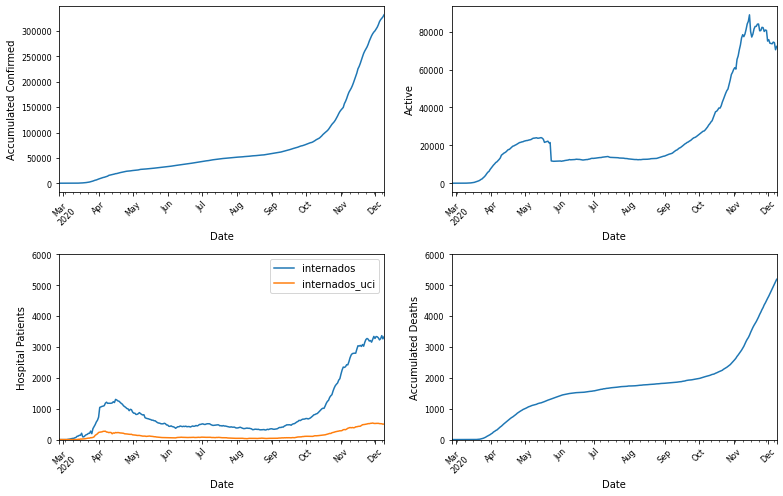

In [9]:
fig, ax = plt.subplots(2,2,figsize = (11,7)) 
data.plot(use_index=True,y=["confirmados"],rot=45,fontsize=8,xlabel="Date",ylabel="Accumulated Confirmed",legend=False, ax=ax[0,0])
data.plot(use_index=True,y=["ativos"],rot=45,fontsize=8,xlabel="Date",ylabel="Active",ax=ax[0,1],legend=False)
data.plot(use_index=True,y=['internados','internados_uci'],rot=45,fontsize=8,xlabel="Date",ylim=(0,6000),
          ylabel="Hospital Patients",ax=ax[1,0])
data.plot(use_index=True,y=["obitos"],rot=45,fontsize=8,xlabel="Date",ylim=(0,6000),ylabel="Accumulated Deaths",ax=ax[1,1],legend=False)
fig.tight_layout(h_pad=1,w_pad=2)
# fig.suptitle('Confirmed cases, Admitted Hospital Patients and Deaths in Portugal', fontsize=12)

Figure 1 - Accumulated confirmed cases (Top Left), active cases (Top Right), admitted hospital patients (Bottom Left) and deaths (Bottom Right) in Portugal, with intense care patients labelled with orange. The second wave appears to start around September.

<AxesSubplot:title={'center':'Country-wide daily new cases'}, xlabel='Date', ylabel='Total count'>

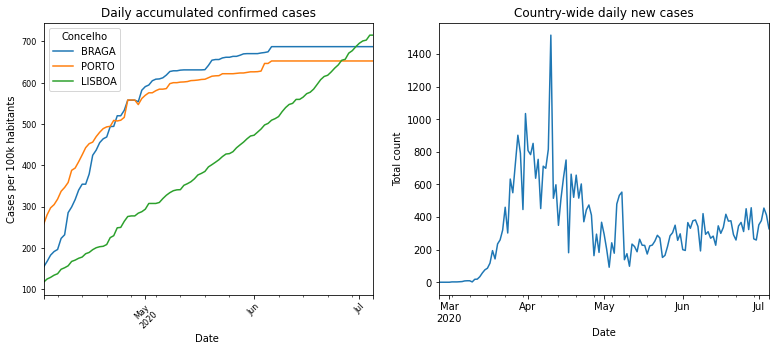

In [10]:
temp_novos = data.loc[data.index <= conc_pop.index[-1],"confirmados_novos"]
# conc_pop_wee.plot(use_index=True,y=["BRAGA","PORTO","LISBOA"],rot=45,fontsize=8,\
# title="Weekly accumulated confirmed cases",xlabel="Date ",ylabel="Cases per 100k habitants")

fig, ax = plt.subplots(1,2,figsize = (13,5))
conc_pop.plot(use_index=True,y=["BRAGA","PORTO","LISBOA"],rot=45,fontsize=8,\
title="Daily accumulated confirmed cases",xlabel="Date ",ylabel="Cases per 100k habitants",ax=ax[0])
temp_novos.plot(use_index=True,y=["confirmados_novos"],ax=ax[1],title="Country-wide daily new cases",ylabel="Total count",xlabel="Date")

Figure 2 - Daily accumulated confirmed cases per 100k habitants in three major portuguese cities, namely Braga, Porto and Lisbon (Left) and country-wide daily new cases (Right) for reference. Cases in Braga and Porto grew exponentially before reaching a plateau, while in Lisbon cases grew in a linear fashion. Overall, Portugal saw a major spike in cases in the middle of April.

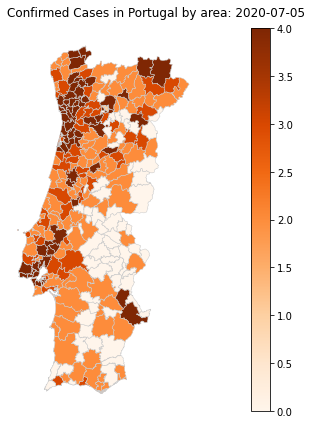

In [11]:
conc_pt_map = geopandas.read_file(CONC_PATH_MAP)
# fix area names
conc_pt_map.rename(columns={"NAME_2":"Concelho"},inplace=True)
conc_pt_map['Concelho'] = conc_pt_map['Concelho'].str.upper()
conc_pt_map['Concelho'].replace(rep_dict,regex=True,inplace=True)

conc_pt_map.loc[conc_pt_map['Concelho'] == 'PRAIA-DA-VITORIA',"Concelho"] = 'VILA-DA-PRAIA-DA-VITORIA'
conc_pt_map.loc[(conc_pt_map['Concelho'] == 'LAGOA') & (conc_pt_map['NAME_1'] == 'Faro'),"Concelho"] = 'LAGOA-(FARO)'
conc_pt_map.loc[(conc_pt_map['Concelho'] == 'CALHETA') & (conc_pt_map['NAME_1'] == 'Azores'),"Concelho"] = 'CALHETA-(AÇORES)'

# # split into four categories
categories = conc_pop[-1:].melt(id_vars=[])
# print(categories.describe())
# categories['category'] = 1 + np.ceil(categories.value.div(categories.value.quantile(0.25)))
categories['category'] = 1 + np.ceil(categories.value.div(categories.value.median())) #!!!
categories['category'] = categories['category'].clip(0,4)

# # merge map data with concelhos category
# conc_pt_map = conc_pt_map.merge(categories[['Concelho', 'category']], how='right', left_on='Concelho', right_on='Concelho')
conc_pt_map = conc_pt_map.merge(categories[['Concelho', 'category']], how='left', left_on='Concelho', right_on='Concelho')
conc_pt_map["category"].fillna(0,inplace=True)

# Skip islands to show only continent
conc_pt_map = conc_pt_map[~conc_pt_map.NAME_1.isin(['Azores', 'Madeira'])]

fig, ax = plt.subplots(figsize=(15,6))
ax.set_title(f"Confirmed Cases in Portugal by area: {conc_pop.index.format()[-1]}", loc="left", pad=12.0) #mudar titulo
ax.axis('off')
conc_pt_map.plot(column='category',cmap='Oranges',ax=ax,legend=True,linewidth=0.5,edgecolor='0.8')
fig.tight_layout()
# plt.savefig('map.png', dpi=300, bbox_inches='tight')
plt.show()
del conc_pt_map

Figure 3 - Confirmed cases in Portugal by smaller area subdivisions. The North of the country has the highest concentration of high case areas.

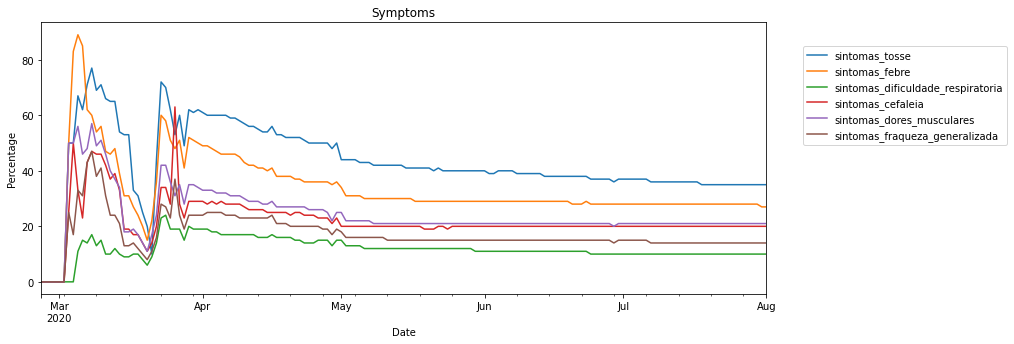

In [12]:
sintomas = [x for x in data.columns if "sintomas" in x]
# data.loc[:,sintomas].value_counts().plot(kind="bar",use_index=True,y=sintomas,ylabel="Total count",title="Symptoms")
fig, ax = plt.subplots(figsize=(13,5))
(data.loc[data.index <= "2020-08-01",sintomas]*100).plot(use_index=True,y=sintomas,ylabel="Percentage",title="Symptoms",ax=ax,xlabel="Date")
plt.legend(loc=(1.05,0.55))

Figure 4 - Percentage of confirmed cases reported to have symptoms. As the data abruptly cuts off after August, only data before August is shown. It appears that symptom percentages stabilize after April.<br>
EN Legend:
+ coughing
+ fever
+ respiratory problems
+ headaches
+ muscle pain
+ generalized weakness.

As the 2019 age group data lacked the gender distribuition, the corresponding values were obtained from the PORDATA portal. As these were from 2011, they were converted to the presumed population in 2019 in the accompanying jupyter notebook "Pordata_process". This simulated 2019 age & gender distribuition data is only used here.

In [13]:
def plotbyage(variable,mfcols):
    male = data.loc[:,[x[1] for x in mfcols]].copy(deep=True)
    male.insert(len(male.columns),"70_plus",male.loc[:,variable+"_70_79_m"]+male.loc[:,variable+"_80_plus_m"])
    male.drop([variable+"_70_79_m",variable+"_80_plus_m"],axis=1,inplace=True)

    fem = data.loc[:,[x[0] for x in mfcols]].copy(deep=True)
    fem.insert(len(fem.columns),"70_plus",fem.loc[:,variable+"_70_79_f"]+fem.loc[:,variable+"_80_plus_f"])
    fem.drop([variable+"_70_79_f",variable+"_80_plus_f"],axis=1,inplace=True)
    labels = []
    for col in male.columns:
        if "plus" not in col: 
            col2 = "_".join(col.split("_")[1:3])
            colf = col.replace("_m","_f")
        else:
            col2 = col
            colf = col
        labels.append(col2)
        male.loc[:,col] = (male.loc[:,col]*100*100 / gegender.loc[:,("M",col2)].sum()).round(1)
        fem.loc[:,colf] = (fem.loc[:,colf]*100*100 / gegender.loc[:,("F",col2)].sum()).round(1)
    return (male,fem,labels)

import re
conf = [x.split(",") for x in re.findall(r"confirmados_[0-9][0-9]_(?:(?!_m)(?:.|\n))*_m",",".join(data.columns))]
death = [x.split(",") for x in re.findall(r"obitos_[0-9][0-9]_(?:(?!_m)(?:.|\n))*_m",",".join(data.columns))]
conf_m,conf_f,labels =  plotbyage("confirmados",conf)                                              
death_m,death_f,labels = plotbyage("obitos",death)

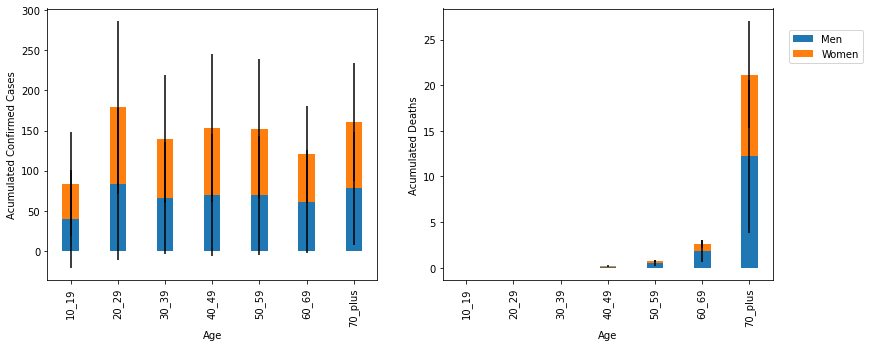

In [14]:
conf_m_means,conf_f_means = conf_m.mean(),conf_f.mean() 
conf_m_std,conf_f_std = conf_m.std(),conf_f.std()
death_m_means,death_f_means = death_m.mean(),death_f.mean()
death_m_std,death_f_std = death_m.std(),death_f.std()
width = 0.35       

fig, ax = plt.subplots(1,2,figsize = (13,5))
ax[0].set_xticks(list(range(len(labels))))
ax[0].set_xticklabels(labels, rotation='vertical')
ax[0].bar(labels, conf_m_means, width, yerr=conf_m_std, label='Men')
ax[0].bar(labels, conf_f_means, width, yerr=conf_f_std, bottom=conf_m_means, label='Women')
ax[0].set_ylabel('Acumulated Confirmed Cases')
ax[0].set_xlabel('Age')

ax[1].set_xticks(list(range(len(labels))))
ax[1].set_xticklabels(labels, rotation='vertical')
ax[1].bar(labels, death_m_means, width, yerr=death_m_std, label='Men')
ax[1].bar(labels, death_f_means, width, yerr=death_f_std, bottom=death_m_means, label='Women')
ax[1].set_ylabel('Acumulated Deaths')
ax[1].set_xlabel('Age')
ax[1].legend(loc=(1.05,0.8))
plt.show()
#title doesnt work???
# fig.suptitle('Average Confirmed cases and Deaths by Gender', fontsize=12) 
# ax[1].set_title('Average Confirmed cases and Deaths by Gender', fontsize=12,loc="center")

Figure 5 - Average accumulated confirmed cases (Left) and deaths (Right) in Portugal, normalized by age and gender. Cases seem to be most prevalent in the 20_29 and 70_plus age groups, with deaths only in age groups 40_49 and above, concentrated on the 70_plus group.

Text(0.5, 0.98, 'Braga')

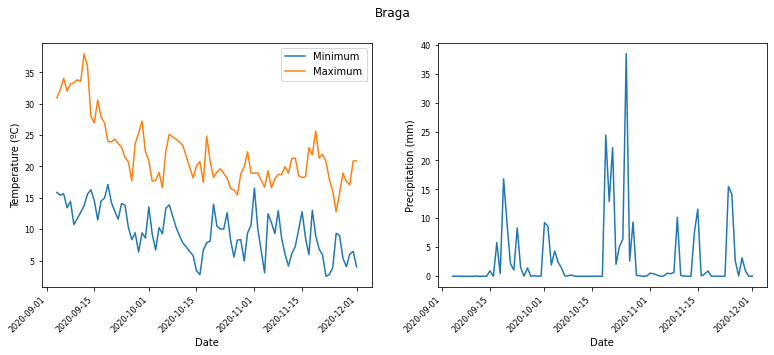

In [15]:
fig, ax = plt.subplots(1,2,figsize = (13,5))
temp_precip.plot(use_index=True,y=[("MinTemp", "BRAGA"),("MaxTemp", "BRAGA")],rot=45,fontsize=8,xlabel="Date",
                 ylabel="Temperature (ºC)",legend=["Mínima","Máxima"], ax=ax[0])
temp_precip.plot(use_index=True,y=[("Precipitation", "BRAGA")],rot=45,fontsize=8,xlabel="Date",
                 ylabel="Precipitation (mm)",ax=ax[1],legend=False)
ax[0].legend(["Minimum", "Maximum"])
fig.suptitle('Braga', fontsize=12)

Figure 6 - Daily temperature (in Celsius) and precipitation (mm) in the city of Braga over time.

<h3>Statistical Analysis

As the ttest_ind p-value > 0.05, the null hypothesis is not rejected. In conclusion, there is no significant difference between confirmed cases in men and women. As expected since the deaths by age/gender were highly schewed towards older age groups, the data is not considered normal. As such, the nonparametric mannwhitney test was run instead and no significant difference in deaths by gender was found.

In [16]:
from scipy import stats
# print("Average confirmed cases:\n",conf_f_means,"(F) vs (M)\n",conf_m_means,"\n")
print("Shapiro normality test - Assumed normal if p-value > 0.05")
print("conf_f_means:",stats.shapiro(conf_f_means))
print("conf_m_means:",stats.shapiro(conf_m_means))
print("death_f_means:",stats.shapiro(death_f_means))
print("death_m_means:",stats.shapiro(death_m_means),"\n")

print("Bartlett parametric equal variances test - assumed equal if p-value > 0.05")
print(stats.bartlett(conf_f_means,conf_m_means))
print("Independent samples t-test - Assumed equal means if p-value > 0.05")
print(stats.ttest_ind(conf_f_means,conf_m_means,equal_var=True),end="\n\n")
print("Mannwhitney nonparametric test - Assumed equal if p-value > 0.05")
print(stats.mannwhitneyu(death_f_means,death_m_means))

del conf_m_means,conf_f_means,death_m_means,death_f_means
del death_m_std,death_f_std,conf_m_std,conf_f_std,labels

Shapiro normality test - Assumed normal if p-value > 0.05
conf_f_means: ShapiroResult(statistic=0.9051072597503662, pvalue=0.363036185503006)
conf_m_means: ShapiroResult(statistic=0.910502552986145, pvalue=0.3993648588657379)
death_f_means: ShapiroResult(statistic=0.5112181901931763, pvalue=2.283830508531537e-05)
death_m_means: ShapiroResult(statistic=0.5589940547943115, pvalue=8.829328726278618e-05) 

Bartlett parametric equal variances test - assumed equal if p-value > 0.05
BartlettResult(statistic=0.27854489228520135, pvalue=0.5976565356297348)
Independent samples t-test - Assumed equal means if p-value > 0.05
Ttest_indResult(statistic=0.9212110037099185, pvalue=0.3750893960496017)

Mannwhitney nonparametric test - Assumed equal if p-value > 0.05
MannwhitneyuResult(statistic=21.0, pvalue=0.34751469713161476)


To study the difference between first and second waves, we divide the country-wide COVID-19 dataset ("data").

In [17]:
# weekly = []
# weekly_sint = []
# weekly_dates = []
# not_sint = set(data.columns.values).difference(set(sintomas)) 

#SAO ACUMULADOS SO PODE NOVOS CASOS!
# for i in range(list(data.index).index(conc_pop_wee.index[0]),len(data.index)-6,7): 
#     weekly_dates.append(data.index[i])
#     weekly.append(data.loc[data.index[i:i+7],"confirmados_novos"].sum())
# data_wee = pd.DataFrame(weekly,index=weekly_dates)
# data_wee = data_wee.loc[:,data_wee.columns!="data_dados"] 

# for i in range(list(data.index).index(conc_pop_wee.index[0]),len(data.index)-6,7): 
#     #ESCALA SINTOMAS E % (0<x<1), NAO E PARA SOMAR!!
#     weekly_sint.append(data.loc[data.index[i:i+7],~data.columns.isin(not_sint)].mean())
# data_wee2 = pd.DataFrame(weekly_sint,index=weekly_dates)
# for c in data_wee2.columns: data_wee[c] = data_wee2[c]
# data_wee = data_wee.reindex(sorted(data_wee.columns), axis=1)
    
data_first_wave = data[data.index < "2020-08-01"] #"2020-07-01"
data_sec_wave = data[data.index >= "2020-08-01"] 
print("data_first_wave shape:",data_first_wave.shape)
print(data_first_wave.loc[data_first_wave.index[-5:],"confirmados_novos"],end="\n\n")
print("data_sec_wave shape:",data_sec_wave.shape)
print(data_sec_wave.loc[data_sec_wave.index[-5:],"confirmados_novos"])
# del weekly, weekly_dates,weekly_sint,data_wee2,not_sint #,conc_pop_wee
# print("data week range:",data_wee.index[:5],"...",end="\n\n")

data_first_wave shape: (157, 85)
data
2020-07-27    135
2020-07-28    111
2020-07-29    203
2020-07-30    255
2020-07-31    204
Name: confirmados_novos, dtype: int64

data_sec_wave shape: (131, 85)
data
2020-12-05    6087
2020-12-06    3834
2020-12-07    2597
2020-12-08    2905
2020-12-09    4097
Name: confirmados_novos, dtype: int64


In [18]:
# from scipy import stats
# print("Shapiro normality test - Assumed normal if p-value > 0.05")
# print("Significant normality count (more_pordata):",(more_pordata.apply(stats.shapiro,axis=0).iloc[1,:] > 0.05).sum(),"\n") #
# print("Significant normality count (conc_pop):",(conc_pop.loc[:,conc_pop.sum()!=0].apply(stats.shapiro,axis=0).iloc[1,:]>0.05).sum())

# conf = [x for x in data.columns if "confirmados_a" in x or x=="confirmados_novos"]
# conf.remove("confirmados_acores")

# print("Mannwhitney nonparametric test - Assumed equal if p-value > 0.05") #[-20:]
# dic = {x:stats.mannwhitneyu(data_first_wave.loc[:,x],data_sec_wave.loc[:,x]) for x in conf} #INUTIL
# for k in dic.keys(): print(k,":\n",dic[k])

In [19]:
#NATAL!!! - ver semana a seguir
print("extra_data Shape:",extra_data.shape)
# print("Total extra_data NA count:",extra_data.isna().sum().sum())
print("Date range:",extra_data.index[0],"-",extra_data.index[-1],"\n")
# extra_data[extra_data.index < "2020-12-25"][-7-1:-1].index
# extra_data[extra_data.index > "2020-12-25"].index
# extra_data.loc[extra_data.index[0],["confirmados","confirmados_novos"]]

antes_natal = extra_data.loc[extra_data[extra_data.index < "2020-12-25"][-7-1:-1].index,"confirmados_novos"]
depois_natal = extra_data.loc[extra_data[extra_data.index > "2020-12-25"].index,"confirmados_novos"]
depois_natal = depois_natal[:min(len(depois_natal),7)]

print("Mannwhitney nonparametric test - Assumed equal if p-value > 0.05")
print(stats.mannwhitneyu(antes_natal,depois_natal))

extra_data Shape: (22, 85)
Date range: 2020-12-10 00:00:00 - 2020-12-31 00:00:00 

Mannwhitney nonparametric test - Assumed equal if p-value > 0.05
MannwhitneyuResult(statistic=17.0, pvalue=0.3085375387259869)


In [20]:
#CORR ENTRE SINTOMAS E MORTES - NEGATIVA???
# sintomas = [x for x in data.columns if "sintomas" in x]
# data_sint = data_wee.loc[np.sum(data_wee.loc[:,sintomas]==0,axis=1)!=len(sintomas),sintomas]
# print(data_wee.loc[:,["obitos"]+sintomas].corr().iloc[:,0],end="\n\n") #-0.7 com "NAs"
# print(data_wee.loc[np.sum(data_wee.loc[:,sintomas]==0,axis=1)!=len(sintomas),["obitos"]+sintomas].corr().iloc[:,0]) #-0.9+!

In [21]:
# Daily meteorological data (minimum & maximum temperature and precipitation) and the corresponding confirmed cases of that
# day have only a small positive correlation.

# mintemp = temp_precip.loc['2020-10-26',"MinTemp"]
# maxtemp = temp_precip.loc['2020-10-26',"MaxTemp"]
# precip = temp_precip.loc['2020-10-26',"Precipitation"]
# conc_pop2 = conc_data.tail(1).transpose().filter(mintemp.index,axis=0)
# latest = pd.concat((mintemp,maxtemp,precip,conc_pop2),axis=1,keys=["MinTemp","MaxTemp","Precipitation","Cases"])
# print(latest.corr().iloc[:,-1])

# diff = set(data.index).difference(temp_precip.index)
# data2 = data.loc[~data.index.isin(diff),"confirmados_novos"]


Most socio-economic variables had a significant (|x|>0.5) corrrelation with the COVID cases by area.

Text(0.5, 1.0, 'Correlation Matrix')

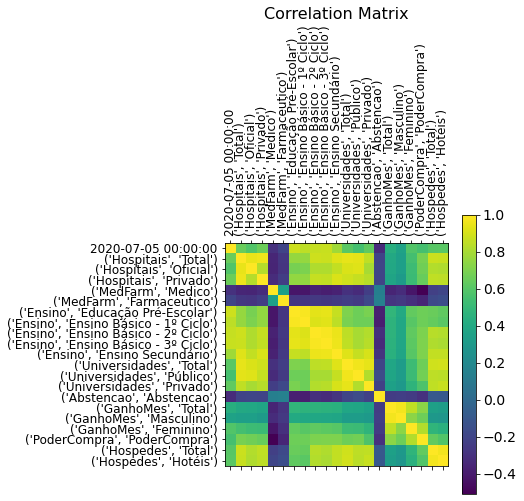

In [22]:
conc_pop2 = conc_data.tail(1).transpose().filter(more_pordata.index,axis=0)
latest = pd.concat((conc_pop2,more_pordata),axis=1) 
#correlation != causation
corr = latest.corr()

f = plt.figure(figsize=(5, 5))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(latest.shape[1]), latest.columns.get_level_values(0), fontsize=12, rotation=90)
plt.yticks(range(latest.shape[1]), latest.columns.get_level_values(0), fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

Figure 7 - Correlation heatmap between socio-economic variables and confirmed cases by area subdivision.

In [23]:
# corr.iloc[:,0].abs()>=0.5
print(corr.loc[corr.iloc[:,0].abs()>=0.5,corr.columns[0]]) #.shape[0]

2020-07-05 00:00:00                   1.000000
(Hospitais, Total)                    0.657452
(Hospitais, Oficial)                  0.592421
(Hospitais, Privado)                  0.662001
(Ensino, Educação Pré-Escolar)        0.887312
(Ensino, Ensino Básico - 1º Ciclo)    0.850547
(Ensino, Ensino Básico - 2º Ciclo)    0.867640
(Ensino, Ensino Básico - 3º Ciclo)    0.875427
(Ensino, Ensino Secundário)           0.784624
(Universidades, Total)                0.614000
(Universidades, Público)              0.552072
(Universidades, Privado)              0.632760
(GanhoMes, Feminino)                  0.589122
(PoderCompra, PoderCompra)            0.555076
(Hospedes, Total)                     0.609418
(Hospedes, Hotéis)                    0.613594
Name: 2020-07-05 00:00:00, dtype: float64


In [24]:
# sint_slim = data_first_wave.loc[np.sum(data_first_wave.loc[:,sintomas]!=0,axis=1)>0,:]
# print(sint_slim.loc[sint_slim.index[:20],sintomas].mean(),end="\n\n")
# print(sint_slim.loc[sint_slim.index[-20:],sintomas].mean(),end="\n\n")

# sint_slim2 = sint_slim.loc[:,sintomas+["obitos","confirmados_novos"]]
# sint_slim2["confirmados_ln"] = np.log(sint_slim2.loc[:,"confirmados_novos"])
# sint_slim2["confirmados_ln_cls"] = round(sint_slim2.loc[:,"confirmados_ln"],0).clip(0,7)
# print(sint_slim2["confirmados_ln_cls"].value_counts())

# print(sint_slim2.shape)
# print(sint_slim2.corr().iloc[:,-3:])


<h3>Unsupervised multivariate analysis

In [25]:
#para cores labels / clusters etc?
nuts2_conc = pd.read_csv(os.path.join(ROOT_FOLDER,"wiki_nuts2_concelhos.csv"),header=0,usecols=["Nível II","Concelhos"])
nuts2_conc['Concelhos'] = nuts2_conc['Concelhos'].str.upper()
nuts2_conc['Concelhos'].replace(rep_dict,regex=True,inplace=True)
nuts2_conc['Nível II'] = nuts2_conc['Nível II'].str.upper()
nuts2_conc['Nível II'].replace(rep_dict,regex=True,inplace=True)

nuts2_conc = nuts2_conc.merge(conc_get[['Concelho']], how='right', left_on='Concelhos', right_on='Concelho')
nuts2_conc.fillna("OTHER",inplace=True) 
print(nuts2_conc["Nível II"].value_counts())

# label_colors = {'REGIAO-DO-CENTRO': 'r', 'REGIAO-DO-NORTE': 'g', 'ALENTEJO': 'b',"UNKNOWN":"c",
#                 "REGIAO-DE-LISBOA":"m","ALGARVE":"y"}

REGIAO-DO-CENTRO    80
REGIAO-DO-NORTE     73
ALENTEJO            27
OTHER               19
REGIAO-DE-LISBOA    18
ALGARVE             11
Name: Nível II, dtype: int64


In [26]:
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

lat_sc = preprocessing.scale(latest)

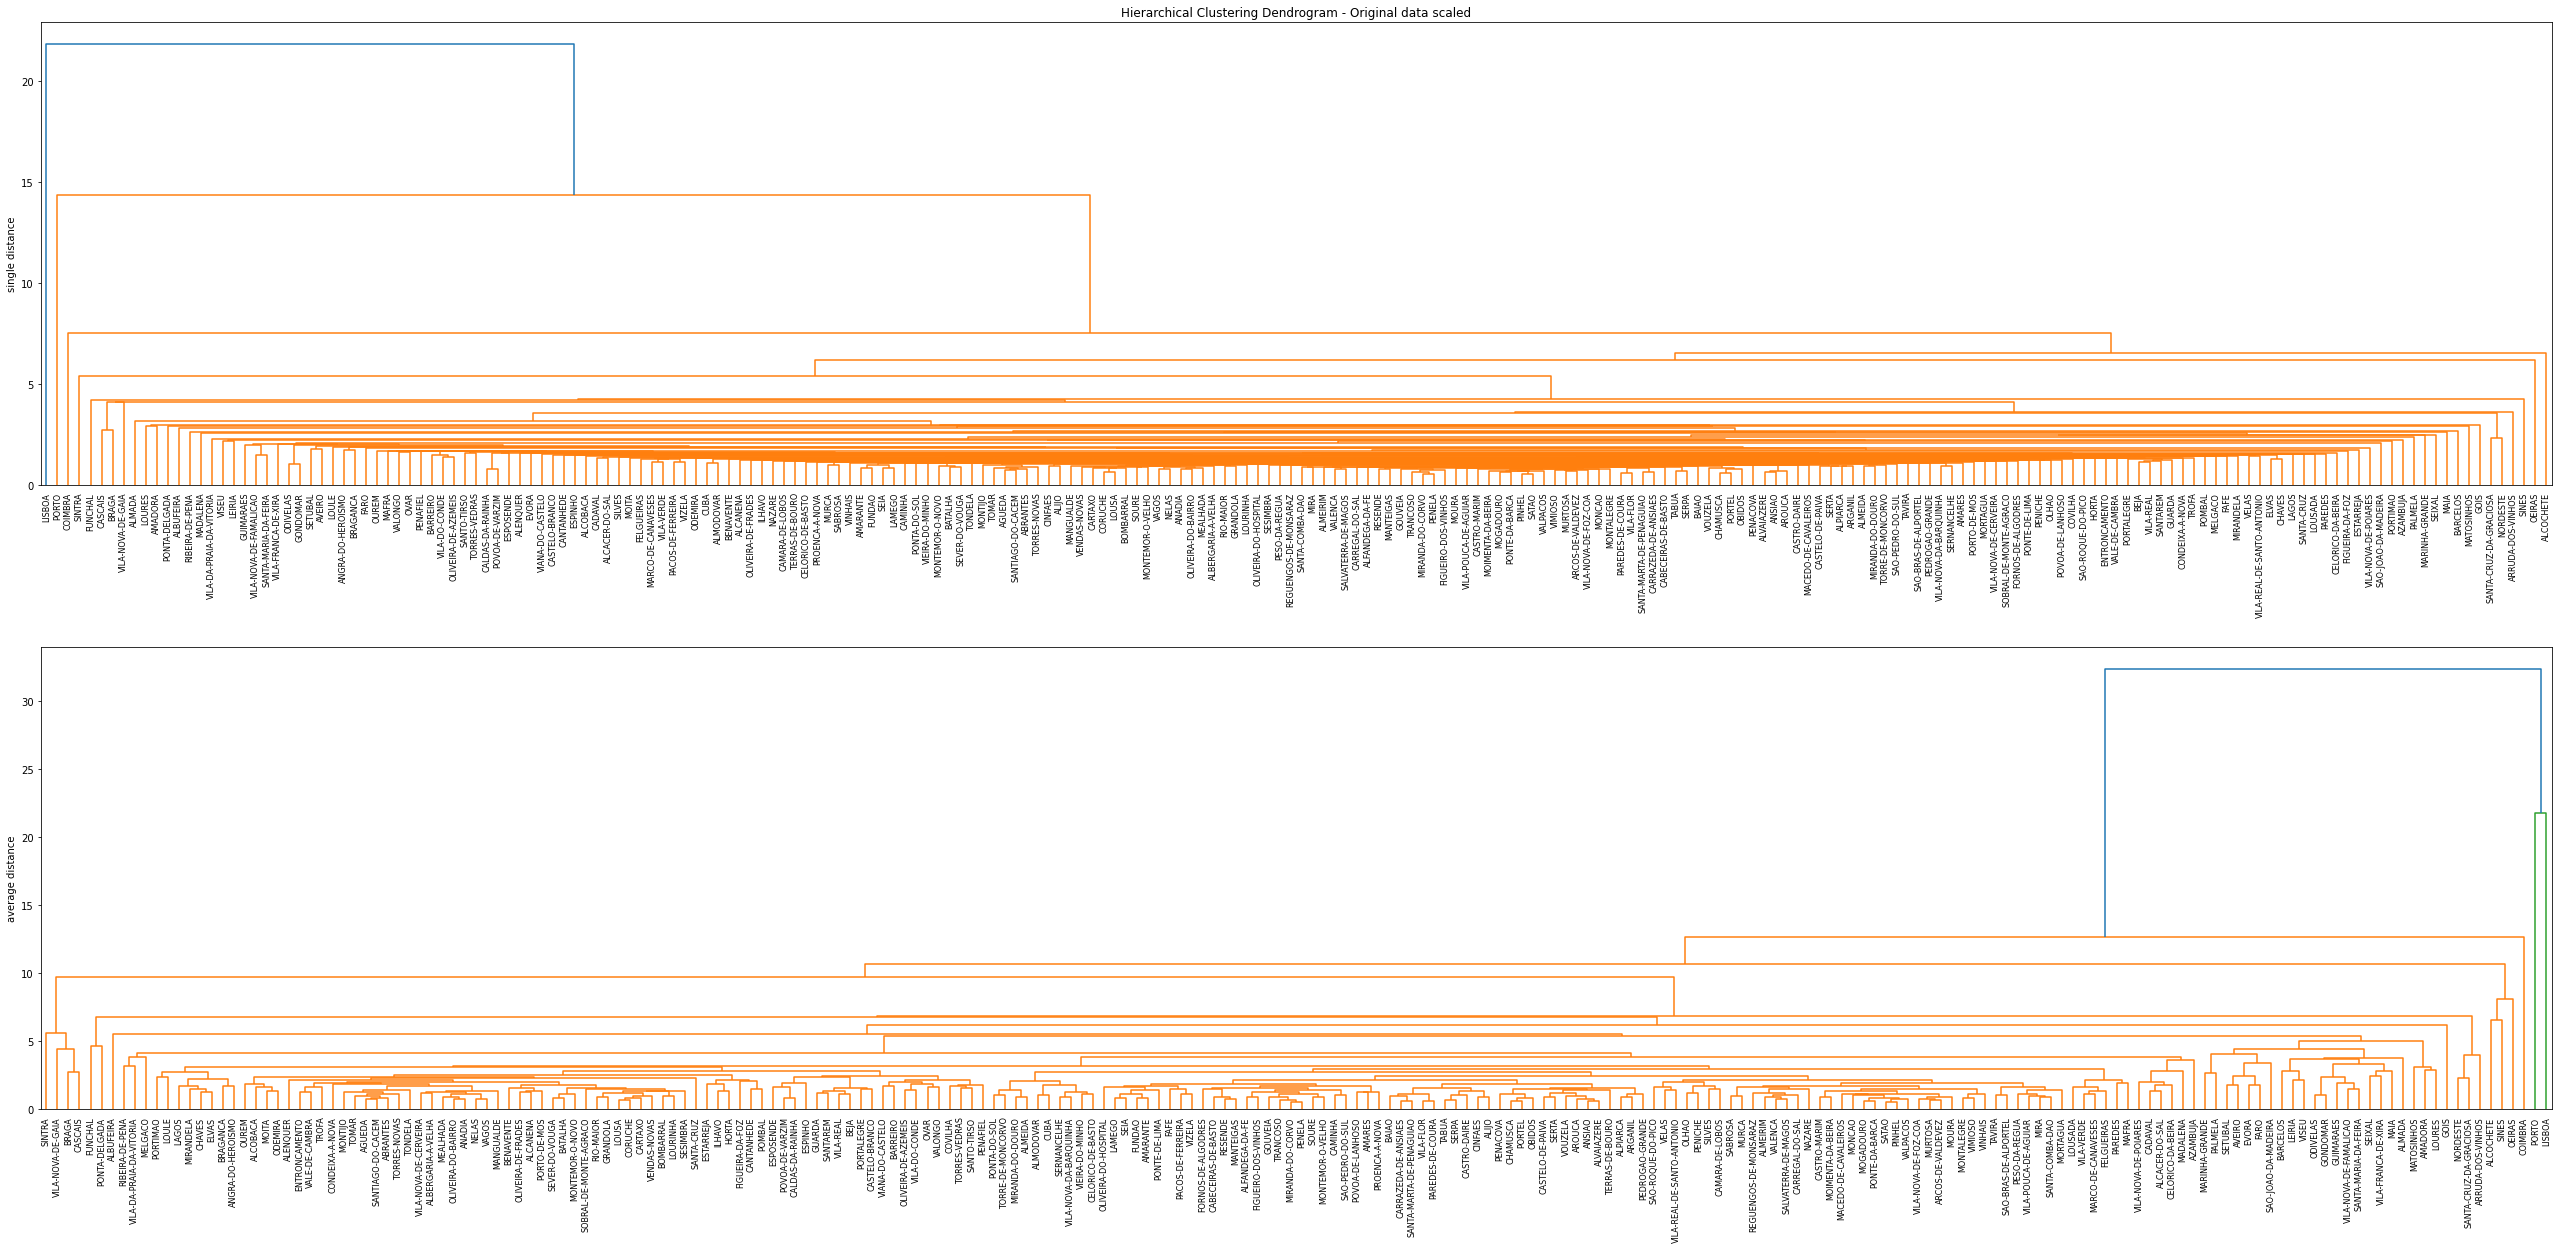

In [27]:
Z = linkage(lat_sc, method='single', metric='euclidean',optimal_ordering=True)
Zav = linkage(lat_sc, method='average', metric='euclidean',optimal_ordering=True)

# calculate full dendrogram
fig, ax = plt.subplots(2,1,figsize=(45, 20))
Z1 = dendrogram(Z, orientation='top', labels=list(latest.index),leaf_font_size=8,ax=ax[0])
Z2 = dendrogram(Zav, orientation='top', labels=list(latest.index),leaf_font_size=8,ax=ax[1]) 
ax[0].set_title('Hierarchical Clustering Dendrogram - Original data scaled')
ax[0].set_ylabel('single distance')
ax[1].set_ylabel('average distance')
plt.subplots_adjust(hspace=0.35)
plt.show()

Figure 8 - Hierarchical clustering dendrogram of the scaled data comparing the single (Top) and average (Bottom) methods. Average method clustering appears to better discriminate clusters.

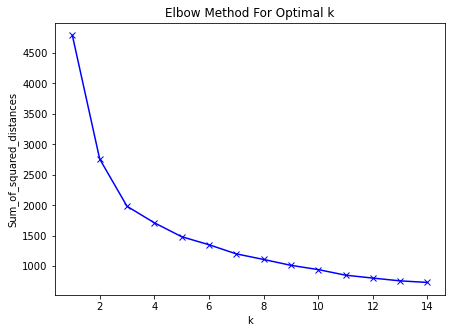

In [28]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(lat_sc)
    Sum_of_squared_distances.append(km.inertia_)

f = plt.figure(figsize=(7, 5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Figure 9 - Elbow method for determining the ideal k parameter for kmeans. Left: Original data scaled. Right: data divided into classes.

In [29]:
k=4
np.random.seed(2) 
kmeans_data = KMeans(n_clusters=k, max_iter=1000)
kmeans_data.fit(lat_sc)
labels = kmeans_data.labels_
centroids = kmeans_data.cluster_centers_

# table = pd.crosstab(labels,nuts2_conc["Nível II"], rownames=['clusters']) #para k=6
# print(table,end="\n\n")
print(pd.DataFrame(labels).value_counts())

# for i in range(k): #???
#     ds = latest2.iloc[np.where(np.array(labels)==i)[0],:] #data_sc.iloc[np.where(labels==i),:]
#     plt.plot(ds[:,0],ds[:,1],'o')  
#     lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
#     plt.setp(lines,ms=10.0)   
#     plt.setp(lines,mew=2.0)    
# plt.show()

3    112
0     90
2     24
1      2
dtype: int64


A PCA was also performed, resulting in a single indistinct cluster.

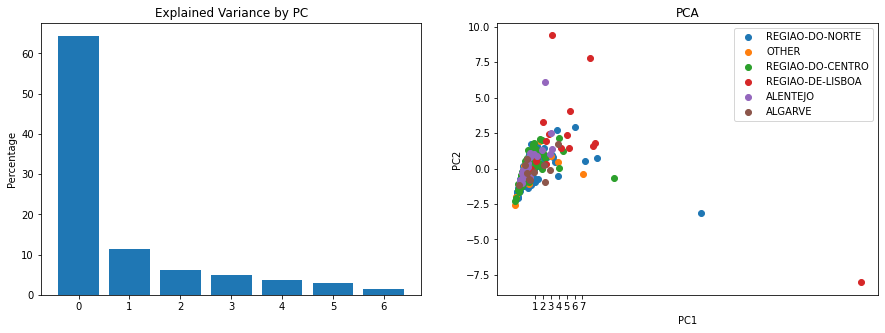

In [37]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=0.95) #n_iter=1000?
pca_data.fit(lat_sc)
x_reduced = pca_data.transform(lat_sc)

fig, ax = plt.subplots(1,2,figsize=(15, 5))
i95 = np.where(pca_data.explained_variance_ratio_.cumsum()*100 >= 95)[0][0]
ax[0].bar(range(i95), pca_data.explained_variance_ratio_[:i95]*100)
plt.xticks(range(i95), list(range(1,i95+1))) #['PC'+str(i) for i in range(1,i95+1)]
ax[0].set_title("Explained Variance by PC")
ax[0].set_ylabel("Percentage")

for nuts in nuts2_conc["Nível II"].unique():
    sp = nuts2_conc.index[nuts2_conc["Nível II"]==nuts]-1
    ax[1].plot(x_reduced[sp,0],x_reduced[sp,1], 'o' , label=nuts)
ax[1].set_title("PCA")
ax[1].legend(bbox_to_anchor=(1, 1), shadow=False) #bbox_to_anchor=(1.05, 1)
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')

plt.show()

Figure 10 - Principal component analysis (PCA) of the data divided into classes. Left: Percentage of variance explained per component up to the component reaching 95% explained variance. Right: PC1 and PC2 plotted. 

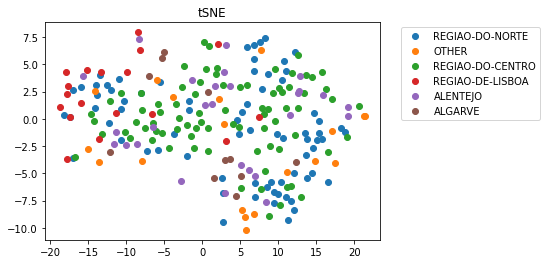

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE() 
points = tsne.fit_transform(lat_sc)

for nuts in nuts2_conc["Nível II"].unique():
    sp = nuts2_conc.index[nuts2_conc["Nível II"]==nuts]-1
    plt.plot(points[sp,0],points[sp,1], 'o' , label=nuts)
plt.title("tSNE")
plt.legend(bbox_to_anchor=(1.05, 1), shadow=False)
plt.show()

<h3>Supervised Machine Learning

In [32]:
def traintest(X,Y,test_size=0.3):
    indices = np.random.permutation(X.shape[0])
    indsplit = int(X.shape[0]*test_size)
    return (X.iloc[indices[:indsplit],:],X.iloc[indices[indsplit:],:],
            Y.iloc[indices[:indsplit]],Y.iloc[indices[indsplit:]])

#regressao?
high_corr = latest.loc[:,corr.iloc[:,0].abs()>0.3] 
high_corrXtest,high_corrXtrain,high_corrYtest,high_corrYtrain = traintest(high_corr.iloc[:,1:],high_corr.iloc[:,0])
print("Socio-economic Test:",high_corrXtest.shape,high_corrYtest.shape)
print("Socio-economic Train:",high_corrXtrain.shape,high_corrYtrain.shape)

#classificaçao
# sintXtest,sintXtrain,sintYtest,sintYtrain = traintest(sint_slim2.iloc[:,:-1],sint_slim2.iloc[:,-1])
# print("Socio-economic Test:",sintXtest.shape,sintYtest.shape)
# print("Socio-economic Train:",sintXtrain.shape,sintYtrain.shape)

Socio-economic Test: (68, 18) (68,)
Socio-economic Train: (160, 18) (160,)


In [33]:
# from sklearn import tree

# tree_model = tree.DecisionTreeClassifier()
# tree_model = tree_model.fit(Xtrain, Ytrain)
# # print(tree_model)
# pred = tree_model.predict(Xtest)

# from sklearn.ensemble import RandomForestClassifier

# rf_model = RandomForestClassifier(n_estimators=100)

# scores_rf = cross_val_score(rf_model, iris.data, iris.target, cv = 5)

# print(scores_rf)
# print(scores_rf.mean())

In [34]:
# from sklearn.neighbors import KNeighborsClassifier
# knn= KNeighborsClassifier()
# print(knn.fit(train_in, train_out))
# print("Valores previstos: ", knn.predict(test_in))
# print("Valores reais: ", test_out)

## References
[1] PT COVID-19 Dataset(s): https://github.com/dssg-pt/covid19pt-data<br>
[2] Unless stated otherwise, all non-COVID data was retrieved from: https://www.pordata.pt/<br>
[3] Meteorological data: http://api.ipma.pt/#services<br>
[4] Area code data (concelhos/distritos) (ipma data extraction): https://github.com/centraldedados/codigos_postais<br>
[5] General area data (NUTS/concelho): https://pt.wikipedia.org/wiki/Lista_de_concelhos_por_NUTS,_distritos_e_ilhas<br>
